ANALYSIS FOR AI DRIVEN SYSTEM

In [1]:
import pandas as pd

# Load my dataset, specifying the dtype for the problematic column
file_path = "Data Analysis - Sample File.csv"
data_df = pd.read_csv(file_path, dtype={'Mixed_Column': str})
data_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_3584\1345440781.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path, dtype={'Mixed_Column': str})


,Brand,Designation,SKU_Code,Salesman_Code,Customer_Phone,Order_Id,Delivered_date,Delivered Qty,Redistribution Value
0,1,FIELD EXECUTIVE,10002778,807259,8060733751,11432770,05/08/2024 00:00,3.0,"46,500"
1,1,FIELD EXECUTIVE,10002778,807881,9016204667,11565436,26/08/2024 00:00,1.0,"15,500"
2,1,FIELD EXECUTIVE,10002778,807881,9016204667,11727113,17/09/2024 00:00,1.0,"15,500"
3,1,FIELD EXECUTIVE,10002778,807881,8060359775,11756045,20/09/2024 00:00,1.0,"15,500"
4,1,FIELD EXECUTIVE,10002778,807881,9075013565,11585122,29/08/2024 00:00,1.0,"15,500"
...,...,...,...,...,...,...,...,...,...
108820,9,VAN SALES EXECUTIVE,VOB4500_,810667,8101599308,12090661,01/11/2024 00:00,1.0,"56,800"
108821,9,VAN SALES EXECUTIVE,VOB4500_,810667,8139407516,12282897,22/11/2024 00:00,1.0,"33,000"
108822,9,VAN SALES EXECUTIVE,VOB4500_,810667,8060468927,12067581,30/10/2024 00:00,4.0,"201,600"
108823,9,VAN SALES EXECUTIVE,VOB4500_,810667,8055148535,12032444,25/10/2024 00:00,1.0,"50,400"


In [2]:
# Convert 'Delivered_date' to datetime objects with the correct format
data_df['Delivered_date'] = pd.to_datetime(data_df['Delivered_date'], format="%d/%m/%Y %H:%M")

# Find the minimum and maximum dates
start_date = data_df['Delivered_date'].min()
end_date = data_df['Delivered_date'].max()

data_df = data_df.sort_values(by='Delivered_date')
# Calculate the total time range
total_days = (end_date - start_date).days

# Print the date range
print(f"Dataset Date Range: {start_date} to {end_date}")
print(f"Total Days: {total_days}")

Dataset Date Range: 2024-08-01 00:00:00 to 2025-01-31 00:00:00
Total Days: 183


THE DATASET AVAILABLE RANGE FROM 1ST AUGUST 2024 TO 31ST JANAUARY 2025

In [3]:
rows, columns = data_df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 108825
Number of columns: 9


In [4]:
# Handle missing values
data_df = data_df.dropna(subset=['Delivered_date', 'Delivered Qty', 'Redistribution Value', 'Customer_Phone'])  # Important columns
data_df = data_df.fillna({'BrandDesignation': 'Unknown', 'Salesman_Code': 'Unknown'}) # fill missing Brand and Salesman with unknown
print("Missing values handled.")
data_df.head(10)

Missing values handled.


,Brand,Designation,SKU_Code,Salesman_Code,Customer_Phone,Order_Id,Delivered_date,Delivered Qty,Redistribution Value
105322,9,FIELD EXECUTIVE,VOB4500_,806871,8075551563,11427787,2024-08-01,1.0,"21,000"
98401,9,FIELD EXECUTIVE,10000536,806871,8036625205,11428688,2024-08-02,1.0,"28,900"
96864,9,FIELD EXECUTIVE,10000533,807209,7064905330,11429781,2024-08-03,1.0,"11,700"
70834,5,Tricycle Sales,CP25X75,809214,7017554573,11430072,2024-08-03,1.0,"9,000"
59564,5,FIELD EXECUTIVE,10002838,808546,8035737119,11429675,2024-08-03,1.0,"17,800"
82373,8,FIELD EXECUTIVE,10002857,806658,7034306202,11429580,2024-08-03,1.0,"18,400"
52954,5,FIELD EXECUTIVE,10002813,808092,7034306202,11429508,2024-08-03,1.0,"18,000"
78947,8,FIELD EXECUTIVE,10002849,806324,8028555147,11430647,2024-08-03,1.0,"18,400"
99860,9,FIELD EXECUTIVE,10000539,806668,8181451332,11429814,2024-08-03,5.0,"57,500"
25042,4,FIELD EXECUTIVE,10000001,808491,8129663474,11429545,2024-08-03,1.0,"11,200"


In [5]:
brand_mapping = {
    1: 'Chair',
    2: 'Table',
    3: 'Pen',
    4: 'Battery',
    5: 'Cable',
    6: 'Bottle',
    7: 'Book',
    8: 'Eraser',
    9: 'Watch'
}
data_df['Brand_Dummy'] = data_df['Brand'].map(brand_mapping).fillna('Unknown')

# Get the list of columns
cols = data_df.columns.tolist()

# Find the index of the 'Brand' column
brand_index = cols.index('Brand')

# Remove the 'Brand_Dummy' column from its current position (which is likely the end)
if 'Brand_Dummy' in cols:
    cols.remove('Brand_Dummy')
# Insert 'Brand_Dummy' at the position immediately after 'Brand'
cols.insert(brand_index + 1, 'Brand_Dummy')

# Reindex the DataFrame with the new column order
data_df = data_df[cols]
data_df

,Brand,Brand_Dummy,Designation,SKU_Code,Salesman_Code,Customer_Phone,Order_Id,Delivered_date,Delivered Qty,Redistribution Value
105322,9,Watch,FIELD EXECUTIVE,VOB4500_,806871,8075551563,11427787,2024-08-01,1.0,"21,000"
98401,9,Watch,FIELD EXECUTIVE,10000536,806871,8036625205,11428688,2024-08-02,1.0,"28,900"
96864,9,Watch,FIELD EXECUTIVE,10000533,807209,7064905330,11429781,2024-08-03,1.0,"11,700"
70834,5,Cable,Tricycle Sales,CP25X75,809214,7017554573,11430072,2024-08-03,1.0,"9,000"
59564,5,Cable,FIELD EXECUTIVE,10002838,808546,8035737119,11429675,2024-08-03,1.0,"17,800"
...,...,...,...,...,...,...,...,...,...,...
34731,4,Battery,FIELD EXECUTIVE,10000400,807609,8061696006,12754513,2025-01-31,3.0,"40,800"
62708,5,Cable,FIELD EXECUTIVE,10003378,808938,8023073483,12756059,2025-01-31,1.0,"20,000"
9699,2,Table,FIELD EXECUTIVE,10002978,807260,8135249394,12755794,2025-01-31,1.0,"94,800"
39321,4,Battery,Tricycle Sales,10000002,806589,8180247101,12758810,2025-01-31,5.0,"47,000"


In [6]:
data_df.shape

(108822, 10)

In [7]:
# Converting to correct data types
data_df['Delivered_date'] = pd.to_datetime(data_df['Delivered_date'], errors='coerce')  # Convert to datetime
data_df['Delivered Qty'] = pd.to_numeric(data_df['Delivered Qty'], errors='coerce')  # Convert to numeric
data_df['Redistribution Value'] = data_df['Redistribution Value'].str.replace(',', '')
data_df['Redistribution Value'] = pd.to_numeric(data_df['Redistribution Value'], errors='coerce')  # Convert to numeric
data_df = data_df.dropna(subset=['Delivered_date', 'Delivered Qty', 'Redistribution Value']) # drop rows where conversion failed
print(data_df['Redistribution Value'].dtype)
data_df.shape
data_df.head(10)

int64


,Brand,Brand_Dummy,Designation,SKU_Code,Salesman_Code,Customer_Phone,Order_Id,Delivered_date,Delivered Qty,Redistribution Value
105322,9,Watch,FIELD EXECUTIVE,VOB4500_,806871,8075551563,11427787,2024-08-01,1.0,21000
98401,9,Watch,FIELD EXECUTIVE,10000536,806871,8036625205,11428688,2024-08-02,1.0,28900
96864,9,Watch,FIELD EXECUTIVE,10000533,807209,7064905330,11429781,2024-08-03,1.0,11700
70834,5,Cable,Tricycle Sales,CP25X75,809214,7017554573,11430072,2024-08-03,1.0,9000
59564,5,Cable,FIELD EXECUTIVE,10002838,808546,8035737119,11429675,2024-08-03,1.0,17800
82373,8,Eraser,FIELD EXECUTIVE,10002857,806658,7034306202,11429580,2024-08-03,1.0,18400
52954,5,Cable,FIELD EXECUTIVE,10002813,808092,7034306202,11429508,2024-08-03,1.0,18000
78947,8,Eraser,FIELD EXECUTIVE,10002849,806324,8028555147,11430647,2024-08-03,1.0,18400
99860,9,Watch,FIELD EXECUTIVE,10000539,806668,8181451332,11429814,2024-08-03,5.0,57500
25042,4,Battery,FIELD EXECUTIVE,10000001,808491,8129663474,11429545,2024-08-03,1.0,11200


In [8]:
duplicate_order_ids = data_df[data_df.duplicated(subset=['Order_Id'], keep=False)]['Order_Id']

duplicate_counts = data_df['Order_Id'].value_counts()[duplicate_order_ids]

# Print the Order IDs and their occurrence counts
print("Duplicate Order IDs and their counts:")
print(duplicate_counts)

Duplicate Order IDs and their counts:
Order_Id
11429781    2
11430072    2
11429675    4
11429580    3
11429508    2
           ..
12758398    2
12756672    2
12754513    2
12756059    3
12754461    5
Name: count, Length: 66330, dtype: int64


In [36]:
#data_df = data_df.drop_duplicates(subset=['Order_Id'])  # assuming Order_Id is unique
data_df = data_df.drop_duplicates(subset=['Order_Id', 'SKU_Code']) # since order_ID is unique to the sku_codes and not the dataset 
print("\nDuplicates removed based on Order_Id and SKU_code.")
data_df.shape


Duplicates removed based on Order_Id and SKU_code.


(108822, 11)

In [37]:
# Extract day of the week
data_df['DayOfWeek'] = data_df['Delivered_date'].dt.day_name()
print("DayOfWeek feature created.")

data_df.head(10)

DayOfWeek feature created.


,Brand,Brand_Dummy,Designation,SKU_Code,Salesman_Code,Customer_Phone,Order_Id,Delivered_date,Delivered Qty,Redistribution Value,DayOfWeek
105322,9,Watch,FIELD EXECUTIVE,VOB4500_,806871,8075551563,11427787,2024-08-01,1.0,21000,Thursday
98401,9,Watch,FIELD EXECUTIVE,10000536,806871,8036625205,11428688,2024-08-02,1.0,28900,Friday
96864,9,Watch,FIELD EXECUTIVE,10000533,807209,7064905330,11429781,2024-08-03,1.0,11700,Saturday
70834,5,Cable,Tricycle Sales,CP25X75,809214,7017554573,11430072,2024-08-03,1.0,9000,Saturday
59564,5,Cable,FIELD EXECUTIVE,10002838,808546,8035737119,11429675,2024-08-03,1.0,17800,Saturday
82373,8,Eraser,FIELD EXECUTIVE,10002857,806658,7034306202,11429580,2024-08-03,1.0,18400,Saturday
52954,5,Cable,FIELD EXECUTIVE,10002813,808092,7034306202,11429508,2024-08-03,1.0,18000,Saturday
78947,8,Eraser,FIELD EXECUTIVE,10002849,806324,8028555147,11430647,2024-08-03,1.0,18400,Saturday
99860,9,Watch,FIELD EXECUTIVE,10000539,806668,8181451332,11429814,2024-08-03,5.0,57500,Saturday
25042,4,Battery,FIELD EXECUTIVE,10000001,808491,8129663474,11429545,2024-08-03,1.0,11200,Saturday


In [38]:
# to handle columns with missing values
missing_counts = data_df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Brand                   0
Brand_Dummy             0
Designation             0
SKU_Code                0
Salesman_Code           0
Customer_Phone          0
Order_Id                0
Delivered_date          0
Delivered Qty           0
Redistribution Value    0
DayOfWeek               0
dtype: int64


In [39]:
data_df.nunique()

Brand                       9
Brand_Dummy                 9
Designation                 5
SKU_Code                  193
Salesman_Code             183
Customer_Phone           4011
Order_Id                67718
Delivered_date            159
Delivered Qty             116
Redistribution Value     1604
DayOfWeek                   7
dtype: int64

## When are customers likely to make their next purchase, and what will the purchase likely be?

In [43]:
def calculate_average_interpurchase_time(data_df, customer_id):
    customer_orders = data_df[data_df['Customer_Phone'] == customer_id].sort_values(by='Delivered_date')
    if len(customer_orders) > 1:
        time_diffs = (customer_orders['Delivered_date'].diff()).dt.days
        average_interval = time_diffs.mean()
        return average_interval
    else:
        return None  # Or some default value, like float('inf')

average_interpurchase_times = data_df.groupby('Customer_Phone').apply(lambda x: calculate_average_interpurchase_time(data_df, x.name))
print(average_interpurchase_times.head())

# To get the next purchase date, you can add this interval to the last purchase date
def predict_next_purchase_date(data_df, customer_id):
    customer_orders = data_df[data_df['Customer_Phone'] == customer_id].sort_values(by='Delivered_date')
    if len(customer_orders) > 0:
        last_purchase_date = customer_orders['Delivered_date'].max()
        avg_interval = calculate_average_interpurchase_time(data_df, customer_id)
        if avg_interval is not None:
            next_purchase_date = last_purchase_date + pd.Timedelta(days=avg_interval)
            return next_purchase_date
        else:
            return None
    else:
        return None

next_purchase_dates = data_df.groupby('Customer_Phone').apply(lambda x: predict_next_purchase_date(data_df, x.name))
print(next_purchase_dates.head())

Customer_Phone
7010009941    15.555556
7010147753    11.923077
7010301833     5.818182
7010572000     3.469388
7010755909     5.375000
dtype: float64
Customer_Phone
7010009941   2025-01-17 13:20:00.000000000
7010147753   2025-02-09 22:09:13.846153846
7010301833   2025-01-11 19:38:10.909090909
7010572000   2025-02-01 11:15:55.102040816
7010755909   2025-02-05 09:00:00.000000000
dtype: datetime64[ns]


In [15]:
# Feature Engineering

In [16]:
 # Aggregate sales by date and SKU
daily_customer_purchase = data_df.groupby(['Delivered_date', 'SKU_Code', 'Customer_Phone'])['Redistribution Value'].sum().reset_index()
daily_customer_purchase = daily_customer_purchase.rename(columns={'Redistribution Value': 'Daily_Sales'})
print("Sales data with every customer track aggregated.")
print(daily_customer_purchase.head(5))

# Calculate 7-day rolling average for each SKU
daily_customer_purchase['Rolling_Avg'] = daily_customer_purchase.groupby('SKU_Code')['Daily_Sales'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)

# Identify anomalies (sales drop of more than 25% from rolling average)
daily_customer_purchase['Sales_Drop_Percentage'] = (daily_customer_purchase['Daily_Sales'] - daily_customer_purchase['Rolling_Avg']) / daily_customer_purchase['Rolling_Avg'] * 100
daily_customer_purchase['Anomaly'] = daily_customer_purchase['Sales_Drop_Percentage'] < -75
# Print the number of anomalies
num_anomalies = daily_customer_purchase['Anomaly'].sum()
print(f"\nNumber of anomalies detected: {num_anomalies}")

csv_file_path = 'daily_customer_purchase.csv'
daily_customer_purchase.to_csv(csv_file_path, index=False) 

Sales data with every customer track aggregated.
  Delivered_date  SKU_Code  Customer_Phone  Daily_Sales
0     2024-08-01  VOB4500_      8075551563        21000
1     2024-08-02  10000536      8036625205        28900
2     2024-08-03  10000001      7033167814        33600
3     2024-08-03  10000001      7034946049        11200
4     2024-08-03  10000001      7035008285       112000

Number of anomalies detected: 4543


In [17]:
# Aggregate sales by date and SKU
daily_sales = data_df.groupby(['Delivered_date', 'SKU_Code'])['Redistribution Value'].sum().reset_index()
daily_sales = daily_sales.rename(columns={'Redistribution Value': 'Daily_Sales'})
print("Sales data aggregated.")
daily_sales.head(10)

Sales data aggregated.


,Delivered_date,SKU_Code,Daily_Sales
0,2024-08-01,VOB4500_,21000
1,2024-08-02,10000536,28900
2,2024-08-03,10000001,324800
3,2024-08-03,10000002,2989600
4,2024-08-03,10000004,125500
5,2024-08-03,10000011,643950
6,2024-08-03,10000382,84700
7,2024-08-03,10000386,307800
8,2024-08-03,10000391,251600
9,2024-08-03,10000400,460000


In [18]:
# Calculate 7-day rolling average for each SKU
daily_sales['Rolling_Avg'] = daily_sales.groupby('SKU_Code')['Daily_Sales'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)

In [19]:
# Identify anomalies (sales drop of more than 25% from rolling average)
daily_sales['Sales_Drop_Percentage'] = (daily_sales['Daily_Sales'] - daily_sales['Rolling_Avg']) / daily_sales['Rolling_Avg'] * 100
daily_sales['Anomaly'] = daily_sales['Sales_Drop_Percentage'] < -75

In [20]:
# Print the number of anomalies
num_anomalies = daily_sales['Anomaly'].sum()
print(f"\nNumber of anomalies detected: {num_anomalies}")


Number of anomalies detected: 588


In [21]:
# Display anomalies
anomalies = daily_sales[daily_sales['Anomaly']]
print("\nAnomalous sales days:")
anomalies.head(10)
anomalies.count()


Anomalous sales days:


Delivered_date           588
SKU_Code                 588
Daily_Sales              588
Rolling_Avg              588
Sales_Drop_Percentage    588
Anomaly                  588
dtype: int64

In [22]:
print("\nDaily sales with anomaly cell")
daily_sales.head(10)


Daily sales with anomaly cell


,Delivered_date,SKU_Code,Daily_Sales,Rolling_Avg,Sales_Drop_Percentage,Anomaly
0,2024-08-01,VOB4500_,21000,21000.0,0.0,False
1,2024-08-02,10000536,28900,28900.0,0.0,False
2,2024-08-03,10000001,324800,324800.0,0.0,False
3,2024-08-03,10000002,2989600,2989600.0,0.0,False
4,2024-08-03,10000004,125500,125500.0,0.0,False
5,2024-08-03,10000011,643950,643950.0,0.0,False
6,2024-08-03,10000382,84700,84700.0,0.0,False
7,2024-08-03,10000386,307800,307800.0,0.0,False
8,2024-08-03,10000391,251600,251600.0,0.0,False
9,2024-08-03,10000400,460000,460000.0,0.0,False


In [23]:
csv_file_path = 'daily_sales.csv'
daily_sales.to_csv(csv_file_path, index=False)  # index=False prevents writing the DataFrame index to the CSV

In [24]:
daily_sales.shape

(10829, 6)


Anomalies for SKU 10000536 (Drop < -90%):
      Delivered_date  Daily_Sales    Rolling_Avg  Sales_Drop_Percentage
4367      2024-10-19        30500  466214.285714             -93.457944
9998      2025-01-18        39200  672000.000000             -94.166667
10766     2025-01-31        39200  470400.000000             -91.666667


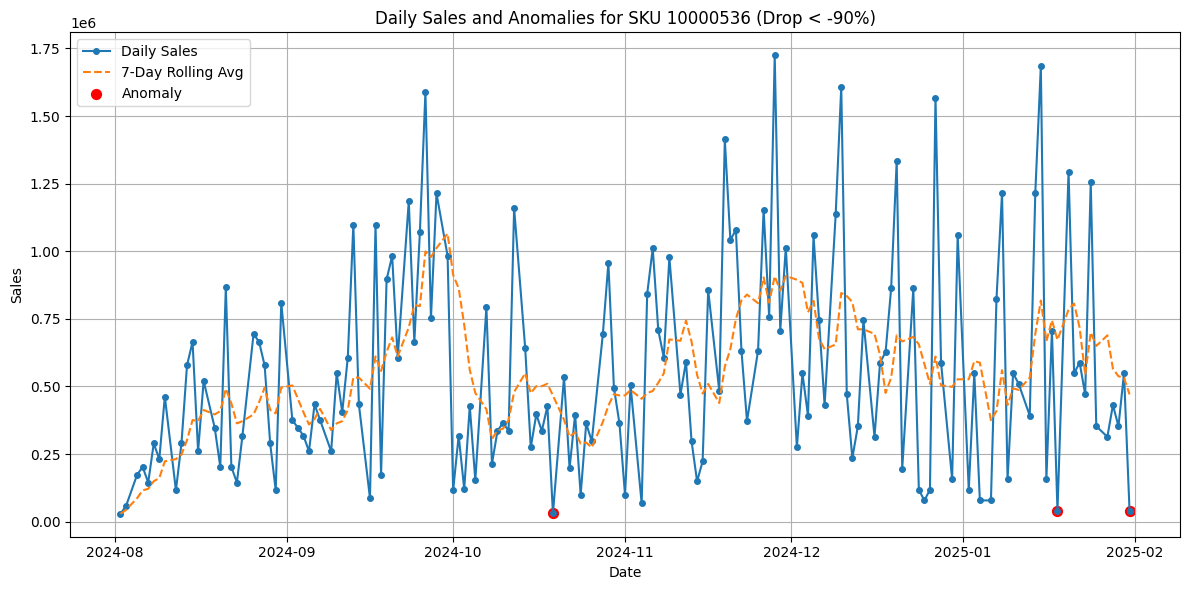

In [25]:
import matplotlib.pyplot as plt
def plot_sku_anomalies(daily_sales, sku_to_visualize, threshold):
    """
    Visualizes daily sales, rolling average, and anomalies for a specific SKU,
    and prints all anomalies for that SKU.

    Args:
        daily_sales (pd.DataFrame): DataFrame with daily sales, rolling average,
            and anomaly information.
        sku_to_visualize (int): The SKU code to visualize.
        threshold (float): The percentage drop threshold used to define anomalies
            (e.g., -25 for a 25% drop).
    """
    sample_data = daily_sales[daily_sales['SKU_Code'] == sku_to_visualize].sort_values('Delivered_date')
    
    # Filter anomalies based on the threshold
    anomalies = sample_data[sample_data['Sales_Drop_Percentage'] < threshold]
    
    # Print all anomalies for the SKU
    if not anomalies.empty:
        print(f"\nAnomalies for SKU {sku_to_visualize} (Drop < {threshold}%):")
        print(anomalies[['Delivered_date', 'Daily_Sales', 'Rolling_Avg', 'Sales_Drop_Percentage']])
    else:
        print(f"\nNo anomalies detected for SKU {sku_to_visualize} (Drop < {threshold}%).")

    plt.figure(figsize=(12, 6))
    plt.plot(sample_data['Delivered_date'], sample_data['Daily_Sales'], label='Daily Sales', marker='o', markersize=4)
    plt.plot(sample_data['Delivered_date'], sample_data['Rolling_Avg'], label='7-Day Rolling Avg', linestyle='--')
    
    # Scatter plot for anomalies
    plt.scatter(
        anomalies['Delivered_date'],
        anomalies['Daily_Sales'],
        color='red',
        label='Anomaly',
        s=50
    )
    
    plt.title(f'Daily Sales and Anomalies for SKU {sku_to_visualize} (Drop < {threshold}%)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

sample_sku = daily_sales['SKU_Code'].unique()[1]
plot_sku_anomalies(daily_sales, sample_sku, -90)


Anomalies for SKU 10000400 (Drop < -90%):
     Delivered_date  Daily_Sales   Rolling_Avg  Sales_Drop_Percentage
8692     2024-12-26       176800  2.122729e+06             -91.671097
9996     2025-01-18       136000  1.950043e+06             -93.025794


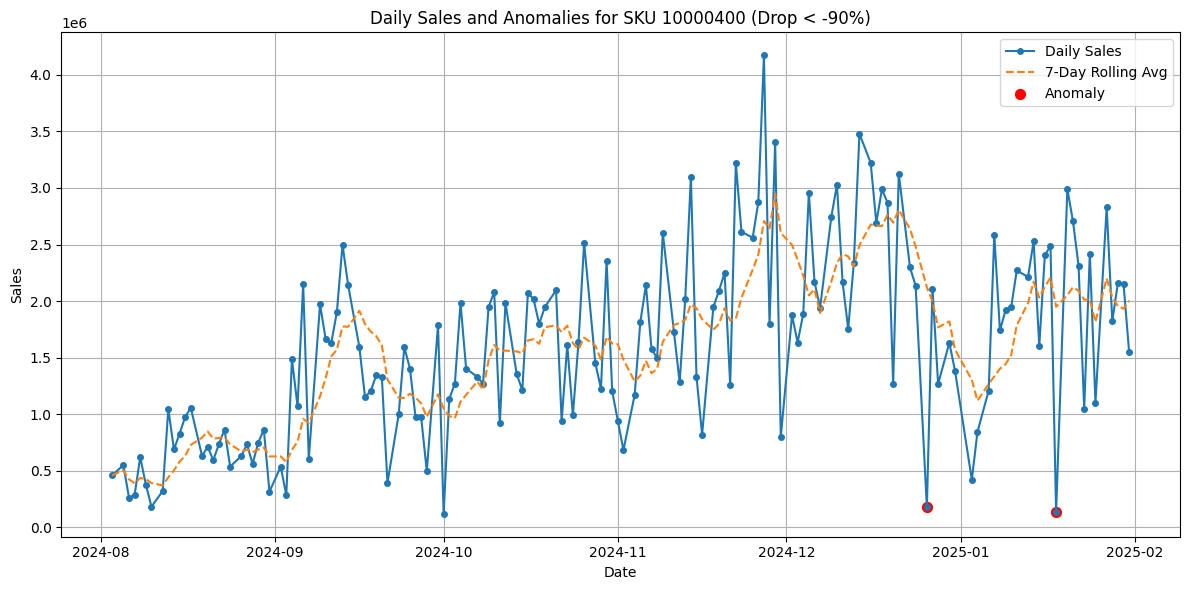

In [26]:
sample_sku = daily_sales['SKU_Code'].unique()[9]
plot_sku_anomalies(daily_sales, sample_sku, -90)

In [28]:
daily_sales

,Delivered_date,SKU_Code,Daily_Sales,Rolling_Avg,Sales_Drop_Percentage,Anomaly
0,2024-08-01,VOB4500_,21000,2.100000e+04,0.000000,False
1,2024-08-02,10000536,28900,2.890000e+04,0.000000,False
2,2024-08-03,10000001,324800,3.248000e+05,0.000000,False
3,2024-08-03,10000002,2989600,2.989600e+06,0.000000,False
4,2024-08-03,10000004,125500,1.255000e+05,0.000000,False
...,...,...,...,...,...,...
10824,2025-01-31,TPMCP35_,8400,1.740000e+04,-51.724138,False
10825,2025-01-31,TPMFB130_,25500,2.125000e+04,20.000000,False
10826,2025-01-31,TPSAN100_,278400,1.044000e+05,166.666667,False
10827,2025-01-31,VOB2600E_,300000,2.344286e+05,27.970750,False


daily_sales['Is_Anomaly'] = daily_sales['Anomaly'].astype(int)

daily_sales

In [29]:
data_df

,Brand,Brand_Dummy,Designation,SKU_Code,Salesman_Code,Customer_Phone,Order_Id,Delivered_date,Delivered Qty,Redistribution Value,DayOfWeek
105322,9,Watch,FIELD EXECUTIVE,VOB4500_,806871,8075551563,11427787,2024-08-01,1.0,21000,Thursday
98401,9,Watch,FIELD EXECUTIVE,10000536,806871,8036625205,11428688,2024-08-02,1.0,28900,Friday
96864,9,Watch,FIELD EXECUTIVE,10000533,807209,7064905330,11429781,2024-08-03,1.0,11700,Saturday
70834,5,Cable,Tricycle Sales,CP25X75,809214,7017554573,11430072,2024-08-03,1.0,9000,Saturday
59564,5,Cable,FIELD EXECUTIVE,10002838,808546,8035737119,11429675,2024-08-03,1.0,17800,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
34731,4,Battery,FIELD EXECUTIVE,10000400,807609,8061696006,12754513,2025-01-31,3.0,40800,Friday
62708,5,Cable,FIELD EXECUTIVE,10003378,808938,8023073483,12756059,2025-01-31,1.0,20000,Friday
9699,2,Table,FIELD EXECUTIVE,10002978,807260,8135249394,12755794,2025-01-31,1.0,94800,Friday
39321,4,Battery,Tricycle Sales,10000002,806589,8180247101,12758810,2025-01-31,5.0,47000,Friday


<Axes: xlabel='Delivered_date', ylabel='Delivered Qty'>

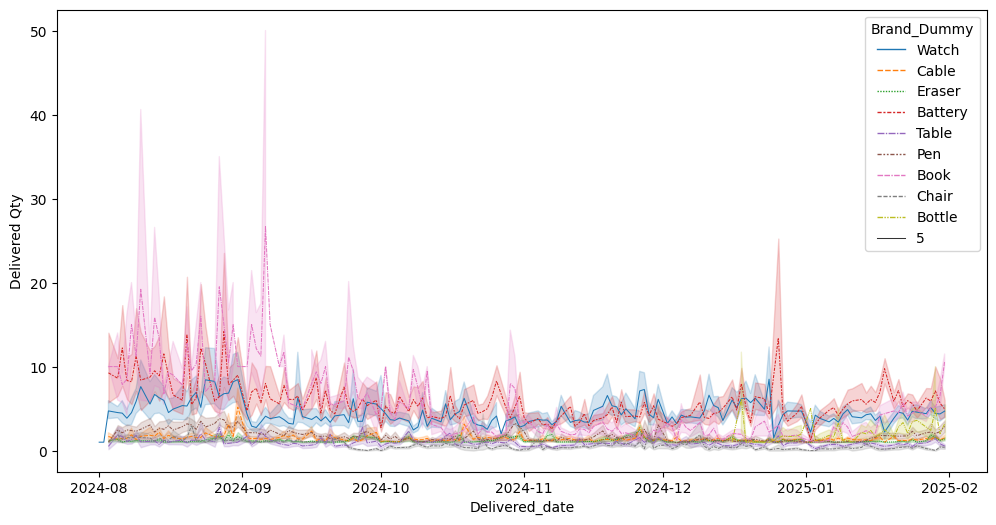

In [30]:
import seaborn as sns
plt.subplots(figsize=[12, 6])
sns.lineplot(
    data=data_df, x="Delivered_date", y="Delivered Qty", hue="Brand_Dummy", style="Brand_Dummy", size=5, 
    color=".7", linewidth=1, #estimator=None, 
)